In [1]:
#Importing Ton of Modules unneccesarily.
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns
from pandas import DataFrame, Series
import sqlite3 as db
from pandasql import sqldf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import resample
from sklearn import model_selection
from sklearn import metrics
from sklearn.decomposition import PCA

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## a)	Attach suitable headers.

##### Importing and Naming Dataset Columns

In [165]:
pks_df = pd.read_csv("parkinson.csv", names = ["Subj_name", "Avg_VFF", "Max_VFF", "Min_VFF", "MOV_ff1", "MOV_ff2", "MOV_ff3", 
         "MOV_ff4", "MOV_ff5", "MOV_A1", "MOV_A2", "MOV_A3", "MOV_A4", "MOV_A5", "MOV_A6", "MRN2_T1", "MRN2_T2"
         ,"Target", "NNDC_M1", "SFCE", "NM_ffv1","NM_ffv2","NNDC_M2","PPE_m"])

In [166]:
parkin_df = pks_df.drop(index = 0 )

In [167]:
parkin_df.head()

,Subj_name,Avg_VFF,Max_VFF,Min_VFF,MOV_ff1,MOV_ff2,MOV_ff3,MOV_ff4,MOV_ff5,MOV_A1,...,MOV_A6,MRN2_T1,MRN2_T2,Target,NNDC_M1,SFCE,NM_ffv1,NM_ffv2,NNDC_M2,PPE_m
1,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.0037,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
2,phon_R01_S01_2,122.4,148.65,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.33559,2.486855,0.368674
3,phon_R01_S01_3,116.682,131.111,111.555,0.0105,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.0827,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
4,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
5,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.1047,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.33218,0.410335


## b) Perform EDA and apply suitable algorithm 

In [168]:
parkin_df['Target'] = parkin_df['Target'].replace(['0','1'],['Healthy','Not_Healthy'])

In [169]:
parkin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 1 to 195
Data columns (total 24 columns):
Subj_name    195 non-null object
Avg_VFF      195 non-null object
Max_VFF      195 non-null object
Min_VFF      195 non-null object
MOV_ff1      195 non-null object
MOV_ff2      195 non-null object
MOV_ff3      195 non-null object
MOV_ff4      195 non-null object
MOV_ff5      195 non-null object
MOV_A1       195 non-null object
MOV_A2       195 non-null object
MOV_A3       195 non-null object
MOV_A4       195 non-null object
MOV_A5       195 non-null object
MOV_A6       195 non-null object
MRN2_T1      195 non-null object
MRN2_T2      195 non-null object
Target       195 non-null object
NNDC_M1      195 non-null object
SFCE         195 non-null object
NM_ffv1      195 non-null object
NM_ffv2      195 non-null object
NNDC_M2      195 non-null object
PPE_m        195 non-null object
dtypes: object(24)
memory usage: 38.1+ KB


In [170]:
parkin_df["Avg_VFF"] = parkin_df["Avg_VFF"].astype('float64')
parkin_df["Max_VFF"] = parkin_df["Max_VFF"].astype('float64')
parkin_df["Min_VFF"] = parkin_df["Min_VFF"].astype('float64')
parkin_df["MOV_ff1"] = parkin_df["MOV_ff1"].astype('float64')
parkin_df["MOV_ff2"] = parkin_df["MOV_ff2"].astype('float64')
parkin_df["MOV_ff3"] = parkin_df["MOV_ff3"].astype('float64')
parkin_df["MOV_ff4"] = parkin_df["MOV_ff4"].astype('float64')
parkin_df["MOV_ff5"] = parkin_df["MOV_ff5"].astype('float64')
parkin_df["MRN2_T1"] = parkin_df["MRN2_T1"].astype('float64')
parkin_df["MRN2_T2"] = parkin_df["MRN2_T2"].astype('float64')
parkin_df["NNDC_M1"] = parkin_df["NNDC_M1"].astype('float64')
parkin_df["NM_ffv1"] = parkin_df["NM_ffv1"].astype('float64')
parkin_df["NM_ffv2"] = parkin_df["NM_ffv2"].astype('float64')
parkin_df["NNDC_M2"] = parkin_df["NNDC_M2"].astype('float64')
parkin_df["PPE_m"] = parkin_df["PPE_m"].astype('float64')
parkin_df["SFCE"] = parkin_df["SFCE"].astype('float64')
parkin_df["MOV_A1"] = parkin_df["MOV_A1"].astype('float64')
parkin_df["MOV_A2"] = parkin_df["MOV_A2"].astype('float64')
parkin_df["MOV_A3"] = parkin_df["MOV_A3"].astype('float64')
parkin_df["MOV_A4"] = parkin_df["MOV_A4"].astype('float64')
parkin_df["MOV_A5"] = parkin_df["MOV_A5"].astype('float64')
parkin_df["MOV_A6"] = parkin_df["MOV_A6"].astype('float64')

In [171]:
parkin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 1 to 195
Data columns (total 24 columns):
Subj_name    195 non-null object
Avg_VFF      195 non-null float64
Max_VFF      195 non-null float64
Min_VFF      195 non-null float64
MOV_ff1      195 non-null float64
MOV_ff2      195 non-null float64
MOV_ff3      195 non-null float64
MOV_ff4      195 non-null float64
MOV_ff5      195 non-null float64
MOV_A1       195 non-null float64
MOV_A2       195 non-null float64
MOV_A3       195 non-null float64
MOV_A4       195 non-null float64
MOV_A5       195 non-null float64
MOV_A6       195 non-null float64
MRN2_T1      195 non-null float64
MRN2_T2      195 non-null float64
Target       195 non-null object
NNDC_M1      195 non-null float64
SFCE         195 non-null float64
NM_ffv1      195 non-null float64
NM_ffv2      195 non-null float64
NNDC_M2      195 non-null float64
PPE_m        195 non-null float64
dtypes: float64(22), object(2)
memory usage: 38.1+ KB


In [172]:
parkin_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_VFF,195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
Max_VFF,195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
Min_VFF,195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MOV_ff1,195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MOV_ff2,195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MOV_ff3,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MOV_ff4,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
MOV_ff5,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MOV_A1,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MOV_A2,195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


Here we can see that the Avg_VFF, Max_VFF, Min_VFF are having large values which makes the Dataset biased

In [173]:
parkin_df.shape

(195, 24)

In [174]:
type(parkin_df)

pandas.core.frame.DataFrame

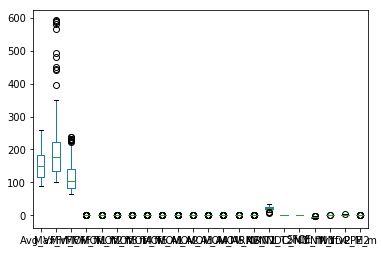

In [106]:
parkin_df.plot(kind = 'box')
#sns.boxplot(parkin_df["Max_VFF"])

Don't need to see individual boxplots as data have outliers in each column except the Target, Average vocal fundamental frequency and a nonlinear dynamical complexity measure

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


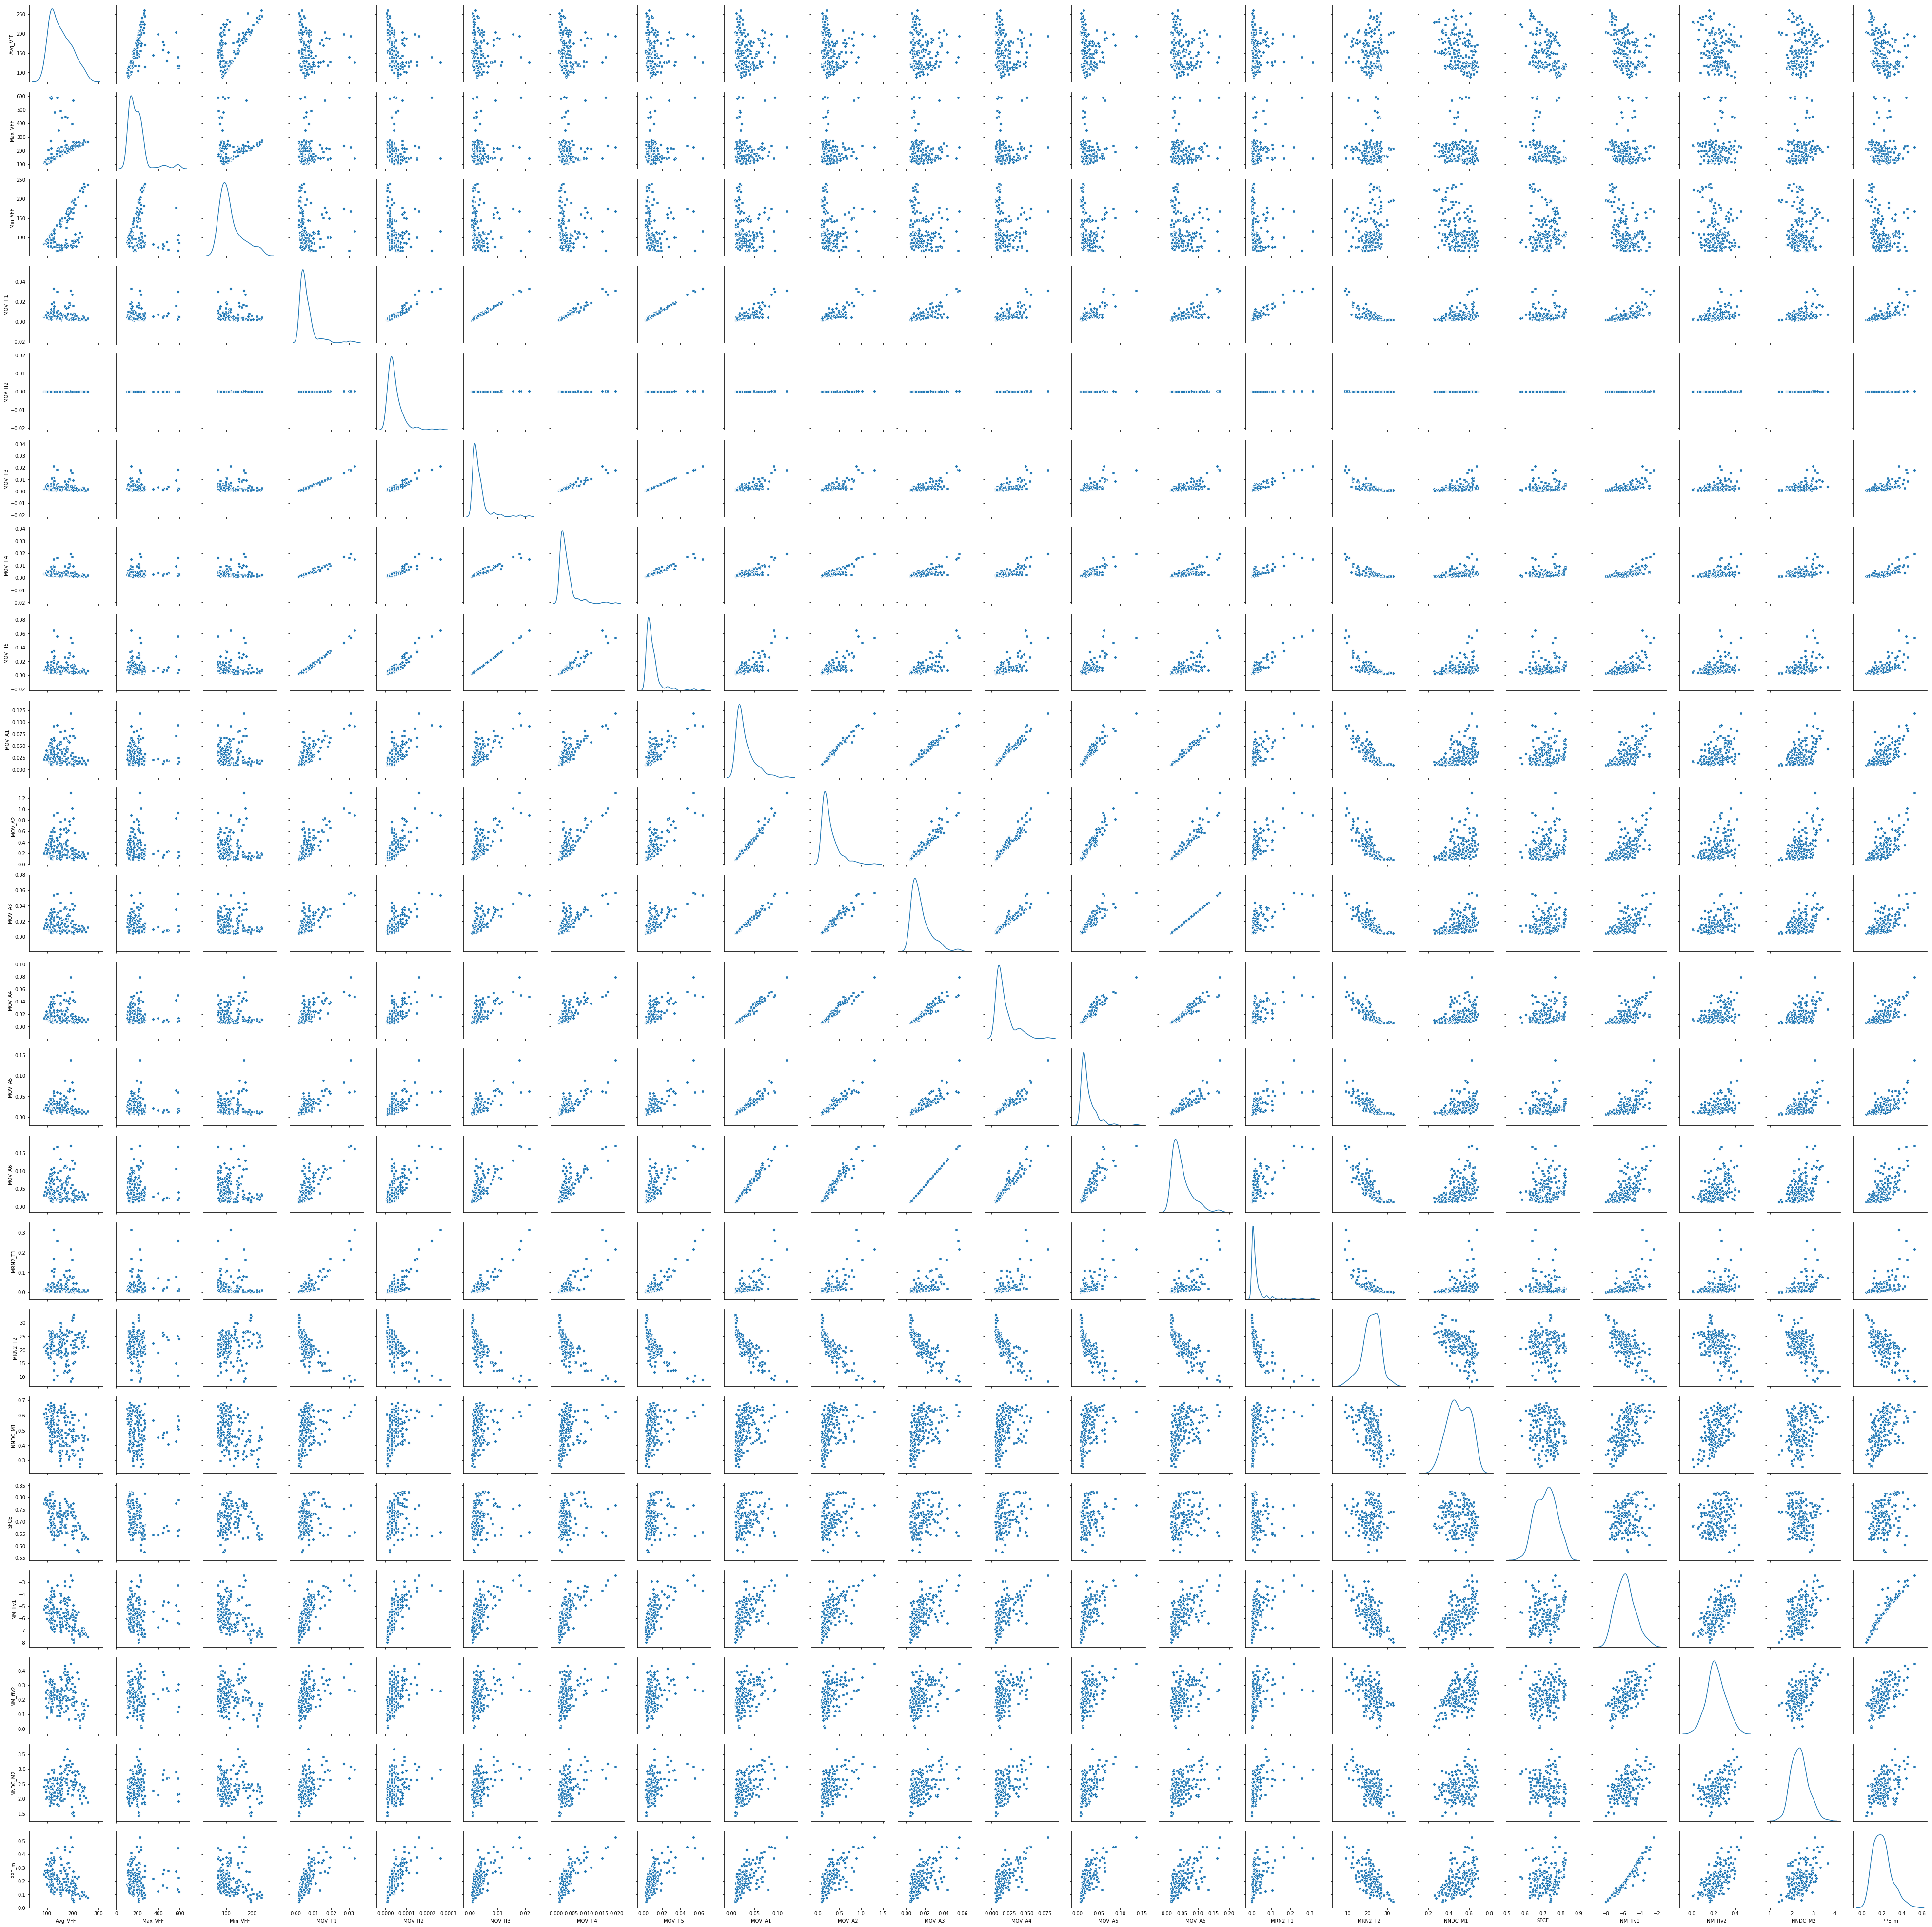

In [104]:
#import seaborn as sns
sns.pairplot(parkin_df, diag_kind='kde')

In [105]:
parkin_df.corr()

,Avg_VFF,Max_VFF,Min_VFF,MOV_ff1,MOV_ff2,MOV_ff3,MOV_ff4,MOV_ff5,MOV_A1,MOV_A2,...,MOV_A5,MOV_A6,MRN2_T1,MRN2_T2,NNDC_M1,SFCE,NM_ffv1,NM_ffv2,NNDC_M2,PPE_m
Avg_VFF,1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.077774,-0.094732,-0.021981,0.059144,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
Max_VFF,0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,0.004937,-0.003733,0.163766,-0.024893,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
Min_VFF,0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.107293,-0.150737,-0.108670,0.210851,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MOV_ff1,-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.758255,0.746635,0.906959,-0.728165,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MOV_ff2,-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.648793,0.697170,0.834972,-0.656810,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MOV_ff3,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.737455,0.744919,0.919521,-0.721543,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MOV_ff4,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.804139,0.763592,0.844604,-0.731510,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
MOV_ff5,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.737439,0.744901,0.919548,-0.721494,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MOV_A1,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.950083,0.987626,0.722194,-0.835271,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MOV_A2,-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.960977,0.963202,0.744477,-0.827805,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


Variables in data do have some High Correlations as well.

### Density Plots

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


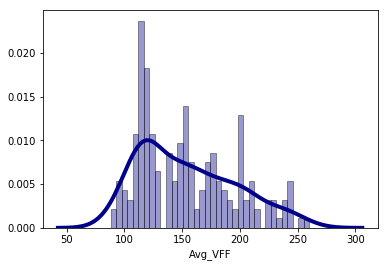

In [107]:
# Density Plot and Histogram of Average vocal fundamental frequency 
sns.distplot(parkin_df['Avg_VFF'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


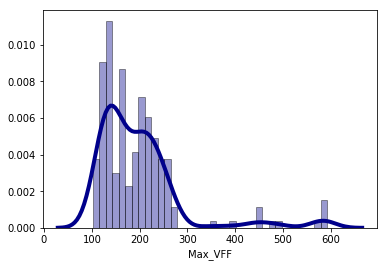

In [108]:
# Density Plot and Histogram of Maximum vocal fundamental frequency 
sns.distplot(parkin_df['Max_VFF'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


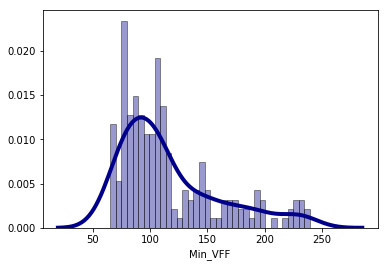

In [109]:
# Density Plot and Histogram of Minimum vocal fundamental frequency 
sns.distplot(parkin_df['Min_VFF'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

All three Density plots are little left skewed but are pretty normal.

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


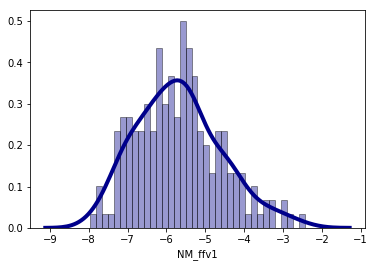

In [110]:

# Density Plot and Histogram of Minimum vocal fundamental frequency 
sns.distplot(parkin_df['NM_ffv1'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Other Density Plots shows Nearly Perfect Normal Distributions

In [113]:
parkin_df.head()

,Subj_name,Avg_VFF,Max_VFF,Min_VFF,MOV_ff1,MOV_ff2,MOV_ff3,MOV_ff4,MOV_ff5,MOV_A1,...,MOV_A6,MRN2_T1,MRN2_T2,Target,NNDC_M1,SFCE,NM_ffv1,NM_ffv2,NNDC_M2,PPE_m
1,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,Not_Healthy,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
2,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,Not_Healthy,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
3,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,Not_Healthy,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
4,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,Not_Healthy,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
5,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,Not_Healthy,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


#### Model Building

In [198]:
parkin_clean = parkin_df.drop('Subj_name', axis = 1)
parkin_clean.head()

,Avg_VFF,Max_VFF,Min_VFF,MOV_ff1,MOV_ff2,MOV_ff3,MOV_ff4,MOV_ff5,MOV_A1,MOV_A2,...,MOV_A6,MRN2_T1,MRN2_T2,Target,NNDC_M1,SFCE,NM_ffv1,NM_ffv2,NNDC_M2,PPE_m
1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,Not_Healthy,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,Not_Healthy,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,Not_Healthy,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,Not_Healthy,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,Not_Healthy,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [199]:
X =  parkin_clean.drop("Target", axis=1)
y =  parkin_clean.pop("Target")

In [200]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

#X_std = StandardScaler().fit_transform(X)
#Using Scalor instead of zscore or Logit
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)

In [201]:
X.head().shape

(5, 22)

In [202]:
LR_df = LogisticRegression()
NB_df = GaussianNB()
KNN_df = KNeighborsClassifier()

In [203]:
LR_df.fit(train_set, train_labels)
NB_df.fit(train_set, train_labels)
KNN_df.fit(train_set, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

###### Accuracy Scores

In [204]:
print("LR Score is",LR_df.score(test_set , test_labels))
print("NB Score is",NB_df.score(test_set , test_labels))
print("KNN Score is",KNN_df.score(test_set , test_labels))

LR Score is 0.8135593220338984
NB Score is 0.711864406779661
KNN Score is 0.7966101694915254


In [205]:
pred_val1 = LR_df.predict(test_set)
pred_val2= NB_df.predict(test_set)
pred_val3 = KNN_df.predict(test_set)

###### Classification Reports

In [206]:
#Let's see how our model performed
print("LR",classification_report(test_labels, pred_val1))
print("NB",classification_report(test_labels, pred_val2))
print("KNN",classification_report(test_labels, pred_val3))

LR              precision    recall  f1-score   support

    Healthy       0.83      0.53      0.65        19
Not_Healthy       0.81      0.95      0.87        40

avg / total       0.82      0.81      0.80        59

NB              precision    recall  f1-score   support

    Healthy       0.53      0.95      0.68        19
Not_Healthy       0.96      0.60      0.74        40

avg / total       0.82      0.71      0.72        59

KNN              precision    recall  f1-score   support

    Healthy       0.82      0.47      0.60        19
Not_Healthy       0.79      0.95      0.86        40

avg / total       0.80      0.80      0.78        59



* From above Models We can say that Logistic Regreesion is better suitable here
* Naive Bayes does gives similar precision/accuracy but its overall test and test figures are not convincing enough. 

## c)	Optimize the model (best model picked in ‘b’) with boosting technique and observe the validation score.

###### Ensemble Learning - Boosting Models


In [217]:
from sklearn.ensemble import AdaBoostClassifier
abcl_norm = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50)
abcl_norm = abcl_norm.fit(train_set, train_labels)

abcl = AdaBoostClassifier( n_estimators= 200) # based Estimator default then
abcl = abcl.fit(train_set, train_labels)

from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(train_set, train_labels)

In [218]:
test_pred = abcl_norm.predict(test_set)
print("Accuracy Score using Default AdaBoostClassifier:",abcl_norm.score(test_set , test_labels))

test_pred = abcl.predict(test_set)
print("Accuracy Score using AdaBoostClassifier:",abcl.score(test_set , test_labels))

test_pred = gbcl.predict(test_set)
print("Accuracy Score using GradientBoostingClassifier:",gbcl.score(test_set , test_labels))

Accuracy Score using Default AdaBoostClassifier: 0.8983050847457628
Accuracy Score using AdaBoostClassifier: 0.8813559322033898
Accuracy Score using GradientBoostingClassifier: 0.9152542372881356


###### On Logistic Regression:

In [234]:
from sklearn.ensemble import AdaBoostClassifier
abcl_norm = AdaBoostClassifier(base_estimator=LR_df, n_estimators=50)
abcl_norm = abcl_norm.fit(train_set, train_labels)

abcl = AdaBoostClassifier( base_estimator= LR_df, n_estimators=200) # based Estimator default then
abcl = abcl.fit(train_set, train_labels)

from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier( n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(train_set, train_labels)

In [235]:
test_pred = abcl_norm.predict(test_set)
print("Accuracy Score using Default AdaBoostClassifier:",abcl_norm.score(test_set , test_labels))

test_pred = abcl.predict(test_set)
print("Accuracy Score using AdaBoostClassifier:",abcl.score(test_set , test_labels))

test_pred = gbcl.predict(test_set)
print("Accuracy Score using GradientBoostingClassifier:",gbcl.score(test_set , test_labels))

Accuracy Score using Default AdaBoostClassifier: 0.7966101694915254
Accuracy Score using AdaBoostClassifier: 0.7966101694915254
Accuracy Score using GradientBoostingClassifier: 0.8983050847457628


## d)	Comment on (c), whether boosting is improving the model performance or not.

* Only Model of having improvment in the Performance is Gradient Boosting Model
* The model when applied with the AdaBoost Classifier shows gradual decrease in the Accuracy Score due the Database Characteristics

## e)	Optimize the model (best model picked in ‘b’) with bagging technique and observe the validation score.

In [220]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True, oob_score=True)
bgcl = bgcl.fit(train_set, train_labels)
bgcl.oob_score_     ### testing the ensemble against OOB

0.8676470588235294

In [221]:
test_pred = bgcl.predict(test_set)
bgcl.score(test_set , test_labels)

0.8305084745762712

In [222]:
from sklearn import metrics
cr = metrics.classification_report(test_pred , test_labels)
print(cr)
# Here the true positive rate is 100% only and 96% is TP so total average is dropping.

             precision    recall  f1-score   support

    Healthy       0.53      0.91      0.67        11
Not_Healthy       0.97      0.81      0.89        48

avg / total       0.89      0.83      0.85        59



In [236]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(train_set, train_labels)
pred_rfc = rfc.predict(test_set)

In [237]:
rfc.score(test_set , test_labels)

0.864406779661017

In [238]:
#Let's see how our model performed
print(classification_report(test_labels, pred_rfc))

             precision    recall  f1-score   support

    Healthy       0.92      0.63      0.75        19
Not_Healthy       0.85      0.97      0.91        40

avg / total       0.87      0.86      0.86        59



## f)	Comment on (e), whether bagging is improving the model performance or not.

* Using Ensemble Technique of Bagging, Model Score according to above data show gradual increase in regular Bagging.
* Using Random Forest in given Dataset the Precision/Accuracy increase is quite good but, Recall score is pretty Questionable for applying through this model.

## g)	Compare and Contrast both bagging and booting technique over the best model selected during the step ‘b’ with Bias and Variance Error using 5-fold Cross Validation Score.

AdaBoost_Default: 0.812895 (0.184284)
AdaBoost: 0.802632 (0.189240)
GradientBoosting: 0.809737 (0.193699)
Bagging: 0.767632 (0.211000)
Random Forest: 0.788158 (0.191449)


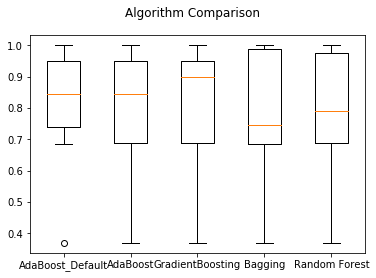

In [239]:
import matplotlib.pyplot as plt
from sklearn import model_selection
models = []
models.append(('AdaBoost_Default', abcl_norm))  # Model Name assigned.
models.append(('AdaBoost', abcl))
models.append(('GradientBoosting', gbcl))
models.append(('Bagging', bgcl))
models.append(('Random Forest', rfc))

# evaluate each model in turn
#Svm is like linear and non-linear regression which have its own kernel.
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring) # X_std for standard Scalor
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#Here the median is definitely more important in the boxplot so, model should be decided by its median value.
# Here , there will be slight variance because the model itself has internal change.

## h)	Give your final inference, which optimization technique (Bagging/Boosting) would be chosen while the best model picked in step ‘b’, is going for production system.

Based on the deducted data:
* Boosting Optimization technique is definetely better for this dataset.
* As shown in above comparision AdaBoost using Default model i.e. Decision Trees performs within strict range and is better.
* GB Classifer have a little bit of more standard deviation but the accuracy is more as compared to the other models.
* Since, as best Algorithm chosen as Logistic Regression when applied Gradient Boosting will be Prefferable choice going for Production System.